In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
files = files.upload()

Saving water_potability.csv to water_potability.csv


In [66]:
data = pd.read_csv("water_potability.csv")
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [7]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [8]:
data.shape

(3276, 10)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [13]:
data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


<Axes: >

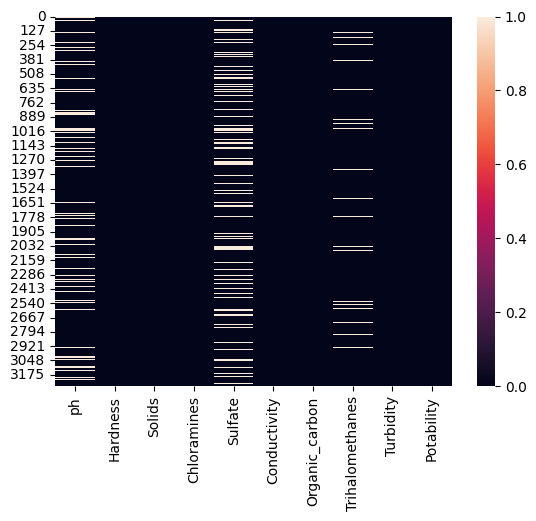

In [17]:
sns.heatmap(data.isnull())

<Axes: >

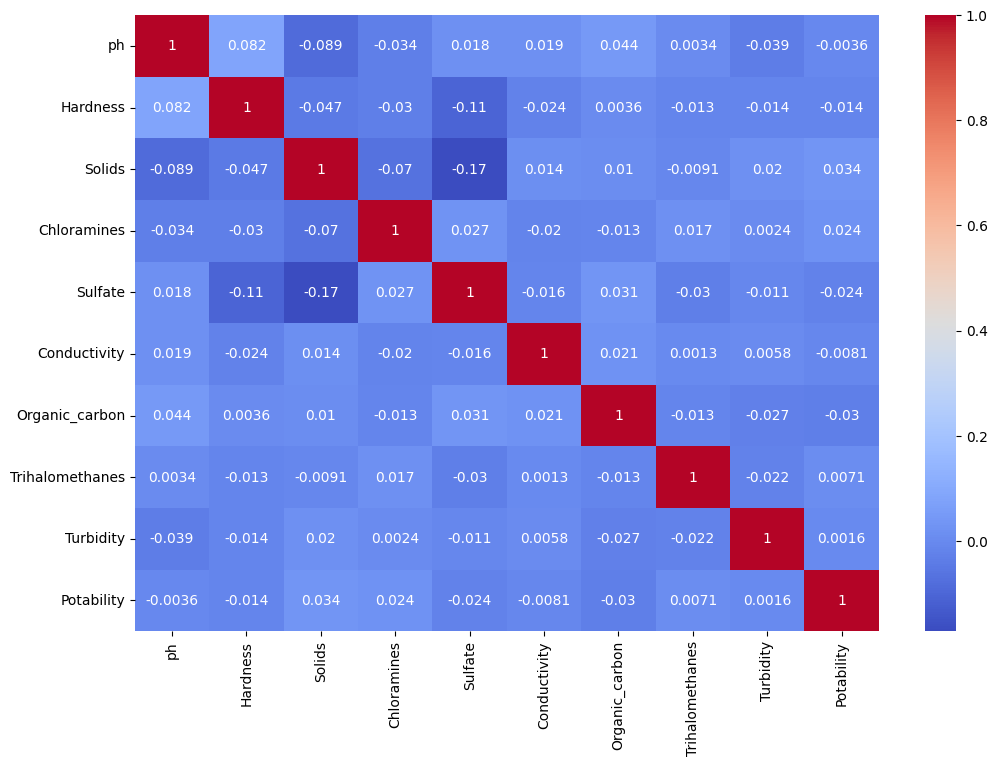

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [30]:
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

,,0
ph,ph,1.000000
Chloramines,Chloramines,1.000000
Solids,Solids,1.000000
Hardness,Hardness,1.000000
Trihalomethanes,Trihalomethanes,1.000000
...,...,...
Chloramines,Turbidity,0.002363
Potability,Turbidity,0.001581
Turbidity,Potability,0.001581
Conductivity,Trihalomethanes,0.001285


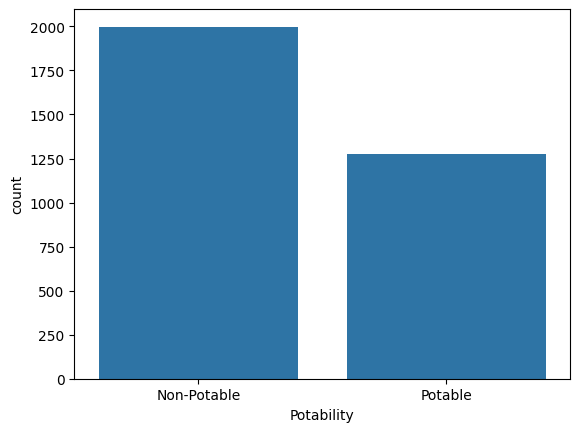

In [31]:
ax = sns.countplot(x = 'Potability', data = data, saturation = 0.8)
plt.xticks(ticks = [0,1], labels = ['Non-Potable', 'Potable'])
plt.show()

In [32]:
x = data['Potability'].value_counts()
labels = [0, 1]
x

,count
Potability,
0,1998
1,1278


<Axes: xlabel='Potability', ylabel='ph'>

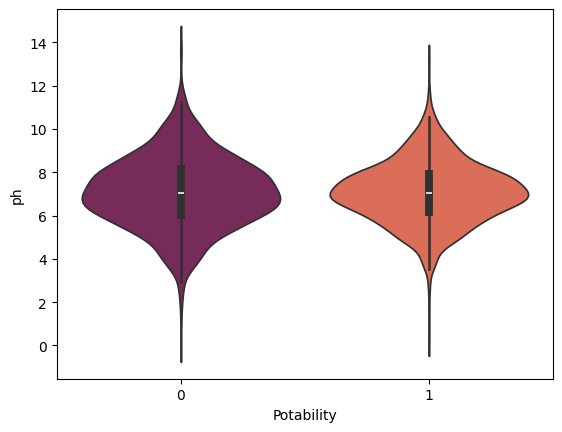

In [33]:
sns.violinplot(x = 'Potability', y = 'ph', data = data, palette = 'rocket')

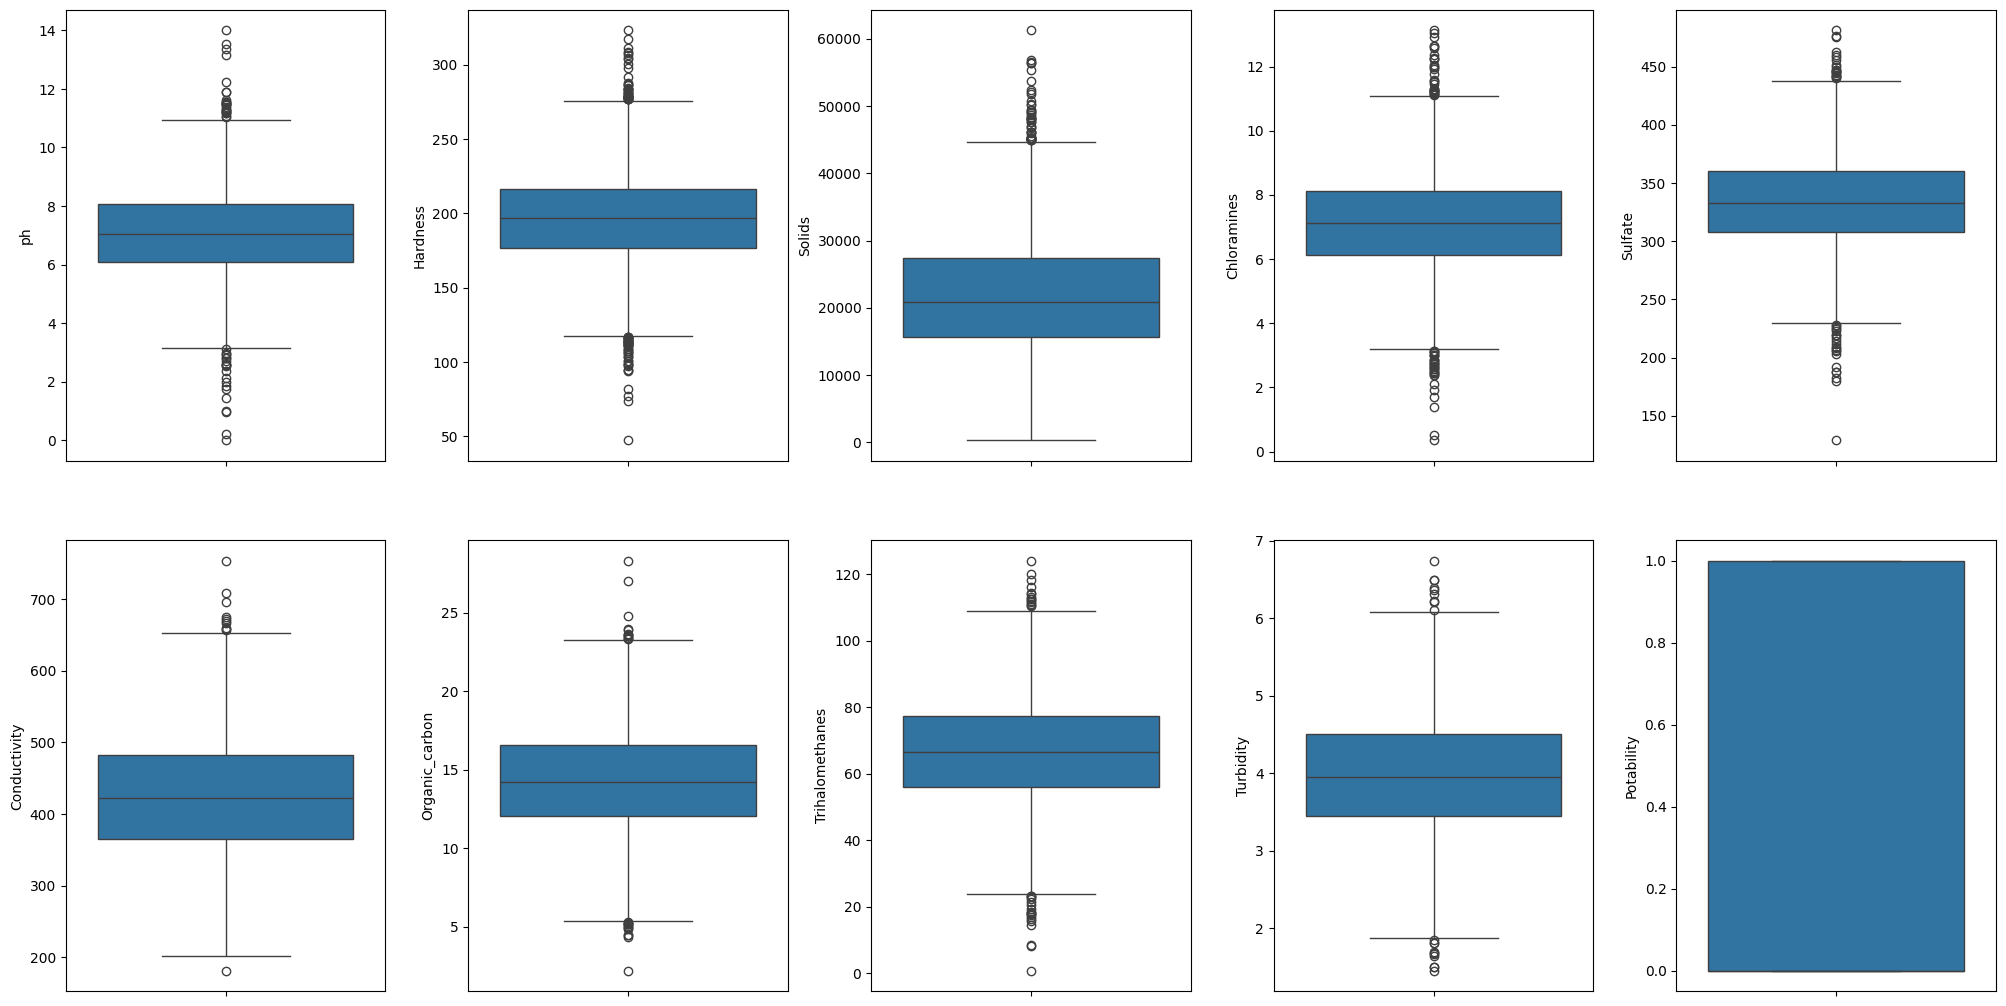

In [34]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()
for col, vvalue in data.items():
  sns.boxplot(y = col, data = data, ax = ax[index])
  index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

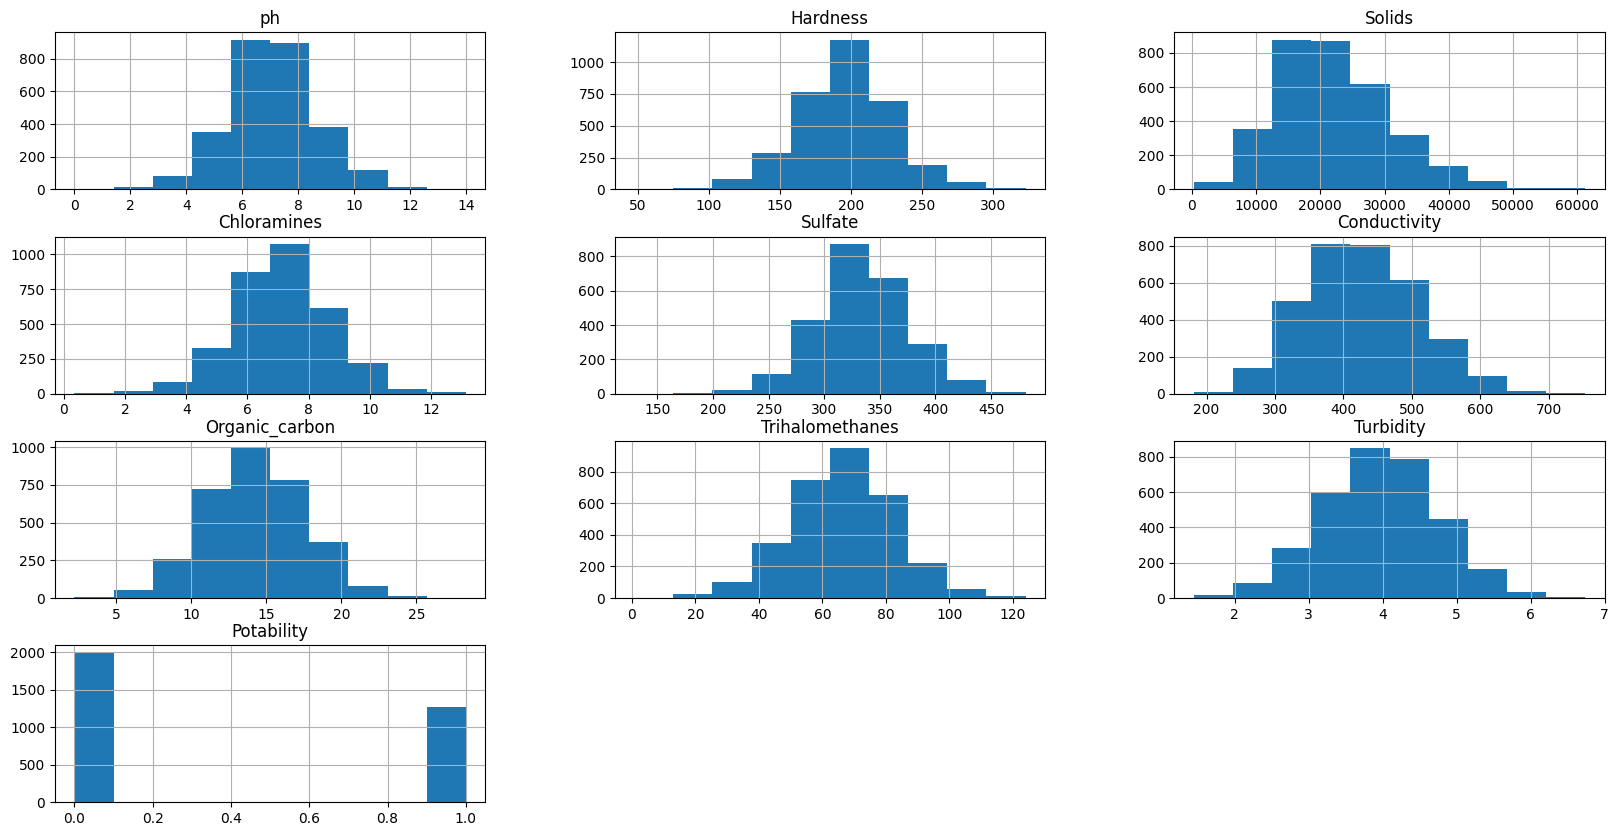

In [37]:
plt.rcParams['figure.figsize'] = [20,10]
data.hist()
plt.show()

In [39]:
sns.pairplot(data, hue = 'Potability')

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Potability', ylabel='Density'>

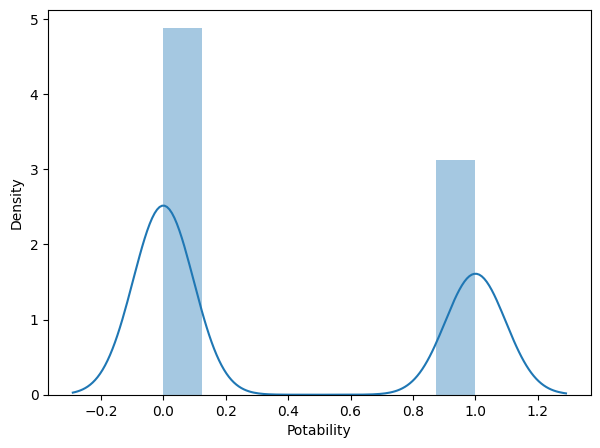

In [41]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(data['Potability'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

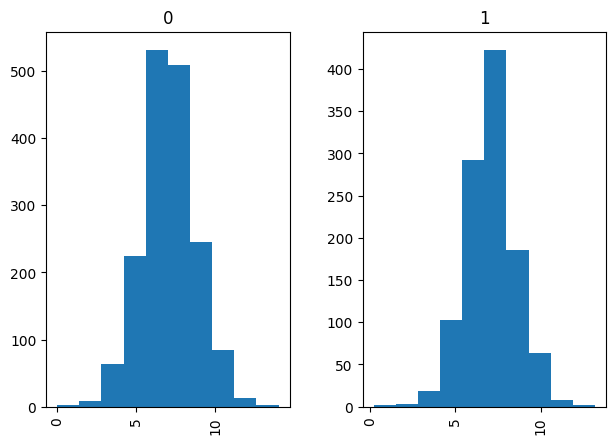

In [42]:
data.hist(column = 'ph', by = 'Potability')

In [43]:
skew_val = data.skew().sort_values(ascending = False)
skew_val

,0
Solids,0.621634
Potability,0.450784
Conductivity,0.264490
ph,0.025630
Organic_carbon,0.025533
Turbidity,-0.007817
Chloramines,-0.012098
Sulfate,-0.035947
Hardness,-0.039342
Trihalomethanes,-0.083031


In [45]:
fig = px.histogram(data, x = "Sulfate", facet_row = "Potability", template = 'plotly_dark')
fig.show()

In [46]:
fig = px.histogram(data, x = "Trihalomethanes", facet_row = "Potability", template = 'plotly_dark')
fig.show ()

In [48]:
fig = px.pie(data, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show()

In [49]:
fig = px.scatter (data, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark", trendline="ols")
fig.show ()

In [50]:
fig = px.box(data, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [51]:
fig = px.box(data, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [52]:
fig = px.scatter (data, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark", trendline="lowess")
fig.show ()

In [67]:
missing_val = data.isnull().mean() * 100
missing_df = missing_val.reset_index()
missing_df.columns = ['Features', 'Missing Percent']
px.bar(missing_df, x = 'Features', y = 'Missing Percent', template = 'plotly_dark',
      labels = {"MissingPercentage": "Percentage of Missing Values", "Feature": "Features"},
      title = 'Missing Data in Percentages',
      text = 'Missing Percent')

In [68]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [35]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
x = data.drop('Potability', axis = 1)
y = data['Potability']

In [71]:
x.shape

(3276, 9)

In [72]:
y.shape

(3276,)

In [73]:
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [75]:
#XGBoost
from xgboost import XGBClassifier
xgb_mod = XGBClassifier(max_depth = 8, n_estimator = 125, random_state = 0, learning_rate = 0.03, n_jobs = 5)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [78]:
xgb = accuracy_score(y_test, xgb_pred)
print(xgb)

0.659206510681587


In [80]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76       617
           1       0.59      0.29      0.39       366

    accuracy                           0.66       983
   macro avg       0.63      0.58      0.58       983
weighted avg       0.64      0.66      0.62       983



<Axes: >

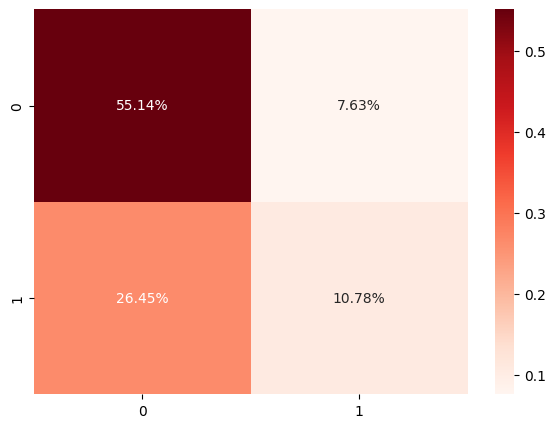

In [87]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm/np.sum(xgb_cm), annot = True, fmt = '0.2%', cmap = 'Reds')